<div style="display: flex; justify-content: space-between;">
    <img src="./logoAIMLab.png" alt="Left Logo" style="max-width: 150px; margin-right: auto;">
    <img src="./TechnionLogo.png" alt="Right Logo" style="max-width: 150px; margin-left: auto;">
</div>

# Oximetry digital biomarkers for intelligent diagnosis and monitoring of patients with respiratory diseases
Jonathan Sobel PhD.
## Introduction
Pulse oximetry is routinely used for monitoring patient’s oxygen saturation level non-invasively [1]. A
low oxygen level in the blood means low oxygen in the tissues and ultimately this can lead to organ failure. The development of digital biomarkers engineered from the oxygen saturation time series (Oximetry biomarkers, OBM) can support diagnosis, characterise subgroups of patients with various disease
severity (phenotyping) and enable continuous monitoring of patient’s pulmonary function to predict eventual deteriorations (prognosis) [2]. Oximetry may be used to sporadically measure the oxygen saturation
level during a medical examination or continuously for monitoring patients in the intensive care unit (ICU)
or overnight for a polysomnography (PSG) study. Delays in recognition of patient deterioration may lead
to harm and even death. The necessity to establish strong patient health monitoring underscores the imperative to create innovative algorithms utilizing advanced signal processing and machine learning. These algorithms would facilitate the diagnosis and early prediction of deterioration in individuals suffering from respiratory illnesses. Hence, we introduce a new resource, the OBM toolbox, developed in python and denoted pobm, for the analysis of continuous oximetry time series recordings (Figure 1). Using this new resource we develop novel data-driven algorithms for Obstructive Sleep Apnea (OSA), Chronic Obstructive Pulmonary Disease (COPD) and
COVID-19 diagnosis and management.


<img src="figure_Hershel.png" width=600 height=400 />

**Figure 1**: Oxygen saturation can be collected continuously using pulse oximetry. This physiological
time series can be used for the purpose of diagnosis and monitoring of several respiratory conditions.
Our innovations include the elaboration of an oximetry digital biomarkers toolbox (pobm) and novel
data-driven algorithms targeted at OSA, COPD and COVID-19 diagnosis and management.

## POBM toolbox
We developed a novel resource for digital oximetry biomakers engineering([POBM toolbox](https://pypi.org/project/pobm/)). Contrary to heart rate variability (HRV) measures which field has seen the development of stable standards and advanced toolboxes and software, until now there was no such standards and open tools for analyzing oxygen saturation time series both in terms of variability and pattern characterization. In general, decisions from the physician are based on single measurement of oximetry (Figure 2) and ignore the history and dynamic of the SpO2 traces. In addition, SpO2 signals are quite different between pathologies.

<img src="Fig_oximetry patterns.png" width=600 height=400 />

**Figure 2**: Usual monitoring of patients relies only discrete/single measurement of oximetry, that cannot capture the underlying dynamic of the signal. Normal oximetry is almost flat while COPD depicts long desaturations and sleep apnea repetitive short desaturations.

The pobm toolbox has several functions. It includes SpO2 signal preprocessing (i.e. artefact removal with filters), a desaturation detector with several options such as absolute or relative thresholds and the computation of oximetry biomarkers on windows of signal.

A desaturation is defined as a significant reduction of SpO2 over a narrow or a prolonged period. In addition, several characteristics can be extracted from each desaturation (Figures 3 and 4). 

<img src="Desat_schema_new.png" width=500 height=300 />

**Figure 3**: Example of SpO2 signal with desaturation parameters highlighted. Here the hard threshold is at 93\% and the relative threshold is of 5\%.

<img src="desat_detected.gif" width=400 height=300 />

**Figure 4**: Example of annimated SpO2 signal with detected desaturations from a COVID-19 patient in ICU.

 The OBM toolbox [6] may provide better understanding of the manifestation and etiology of specific diseases and may be used for the purpose of general health monitoring [2]. The python OBM toolbox, denoted pobm, extracts a total of 44 digital oximetry biomarkers from the SpO2 signal by default. However more OBM can be extracted using different thresholds or OBM parameters. These biomarkers are divided into 5 categories:

- *General Statistics*: time-based statistics describing the oxygen saturation data distribution. e.g.
Zero-Crossing [7] and delta index [8].

- *Complexity*: quantifies the presence of long-range correlations in non-stationary time series. e.g.
Approximate Entropy [9], or Detrended Fluctuation Analysis (DFA) [10].

- *Periodicity*: quantifies consecutive events to identify periodicity in the oxygen saturation time
series. e.g. Phase-rectified signal averaging (PRSA) [11] and power spectral density (PSD).

-  *Desaturations*: time-based descriptive measures of the desaturation patterns occurring through-
out the time series. e.g. area, slope, length and depth of the desaturations.

-  *Hypoxic Burden*: time-based measures quantifying the overall degree of hypoxemia imposed on
the heart and other organs during the recording period. e.g. cumulative time under the baseline
(CT) [12].

| Biomarker (OBMs)    | Category              | Definition                                                                                                                                | Unit                      |
|---------------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------|---------------------------|
| Biomarker (OBMs)    | Category              | Definition                                                                                                                                | Unit                      |
| CA\_hard\_93        | Hypoxic Burden Measures | Integral of SpO2 below the x SpO2 level normalized by the total recording time, by default x = AV, here 93                                | \%                        |
| CT\_hard\_93        | Hypoxic Burde nMeasures | Cumulative time below the x\% oxygen saturation level normalized by the total recording time, by default x = 90. here x=93                | \%                        |
| POD\_hard\_93       | Hypoxic Burden Measures | Time of oxygen desaturation event, normalized by the total recording   time, by default x = 3                                             | s                         |
| AODmax\_hard\_93    | Hypoxic Burden Measures | The area under the oxygen desaturation event curve, using the maximum   SpO2 value as baseline and normalized by the total recording time | \%                        |
| AOD100\_hard\_93    | Hypoxic Burden Measures | Cumulative area of desaturations under the 100\% SpO2 level as baseline and normalized by the total recording time                        | \%                        |
| ODI\_hard\_93       | Desaturations Measures | The oxygen desaturation index                                                                                                             | event/h                   |
| DL\_u\_hard\_93     | Desaturations Measures | Mean of desaturations length                                                                                                              | s                         |
| DL\_sd\_hard\_93    | Desaturations Measures | Standard deviation of desaturations length                                                                                                | s*s                       |
| DA100\_u\_hard\_93  | Desaturations Measures | Desaturation area: mean of desaturation area under the 100\% SpO2 level as baseline                                                       | \%*s                      |
| DA100\_sd\_hard\_93 | Desaturations Measures | Standard deviation of desaturation area under the 100\% SpO2 level as baseline                                                            | \%*\%*s*s                 |
| DAmax\_u\_hard\_93  | Desaturations Measures | Desaturation area defined as the mean of the desaturation areas using   the maximum SpO2   value in each desaturation event as baseline   | \%*s                      |
| DAmax\_sd\_hard\_93 | Desaturations Measures | Standard deviation of desaturation area                                                                                                   | \%*\%*s*s                 |
| DD100\_u\_hard\_93  | Desaturations Measures | Mean of desaturations depth using 100\% SpO2 level as baseline                                                                            | \%                        |
| DD100\_sd\_hard\_93 | Desaturations Measures | Standard deviation of desaturations depth using 100\% SpO2 level as baseline                                                              | \%*\%                     |
| DDmax\_u\_hard\_93  | Desaturations Measures | Mean of desaturations depth                                                                                                               | \%                        |
| DDmax\_sd\_hard\_93 | Desaturations Measures | Standard deviation of desaturation depth                                                                                                  | \%*\%                     |
| DS\_u\_hard\_93     | Desaturations Measures | Mean of the desaturation slope                                                                                                            | \%/s                      |
| DS\_sd\_hard\_93    | Desaturations Measures | Standard deviation of the desaturation slope                                                                                              | (\%*\%)/(s*s)             |
| TD\_u\_hard\_93     | Desaturations Measures | Mean of time between two consecutive desaturation events                                                                                  | s                         |
| TD\_sd\_hard\_93    | Desaturations Measures | Standard deviation of time between two consecutive desaturation events                                                                    | s*s                       |
| DL\_a\_u\_hard\_93  | Desaturations Measures | Mean   of length from the beginning of the desaturations to the lower point                                                               | s                         |
| DL\_a\_sd\_hard\_93 | Desaturations Measures | Standard   deviation of length from the beginning of the desaturations to the lower   point                                               | s*s                       |
| DL\_b\_u\_hard\_93  | Desaturations Measures | Mean   of length from the lower point of the desaturations to the end                                                                     | s                         |
| DL\_b\_sd\_hard\_93 | Desaturations Measures | Standard   deviation of length from the lower point of the desaturations to the end                                                       | s*s                       |
| AV                  | Overall Measures       | Blood oxygen saturation (SpO2) mean                                                                                                       | \%                        |
| MED                 | Overall Measures       | SpO2 median                                                                                                                               | \%                        |
| Min                 | Overall Measures       | SpO2 minimum                                                                                                                              | \%                        |
| SD                  | Overall Measures       | SpO2 standard   deviation                                                                                                                 | \%                        |
| RG                  | Overall Measures       | SpO2 range                                                                                                                                | \%                        |
| P                   | Overall Measures       | xth percentile SpO2 value, by default x = 1                                                                                               | \%                        |
| M                   | Overall Measures       | Percentage of the signal at least x\% below median oxygen saturation, by default x = 2                                                    | \%                        |
| ZC                  | Overall Measures       | Number of zero-crossing points at the x\% SpO2 level, by default x = AV                                                                   | nu                        |
| DI                  | Overall Measures       | Delta index, by default x = 12 s.                                                                                                         | \%                        |
| PRSAc               | Periodicity Measures   | Phase-rectified signal averaging (PRSA) capacity. With d the fragment duration, here d = 10                                               | \%                        |
| PRSAad              | Periodicity Measures   | PRSA amplitude difference. With d the fragment duration, here d = 10                                                                      | \%                        |
| PRSAos              | Periodicity Measures   | PRSA overall slope. With d   the fragment duration, here d = 10                                                                           | \%/s                      |
| PRSAsb              | Periodicity Measures   | PRSA slope before the anchor point. With d the fragment duration, here d = 10                                                             | \%/s                      |
| PRSAsa              | Periodicity Measures   | PRSA slope after the anchor point. With d the fragment duration, here d = 10                                                              | \%/s                      |
| AC                  | Periodicity Measures   | Autocorrelation                                                                                                                           | \%*\%                     |
| PRSAc\_long         | Periodicity Measures   | Phase-rectified   signal averaging (PRSA) capacity. With d the fragment duration, here d = 20                                             | \%                        |
| PRSAad\_long        | Periodicity Measures   | PRSA   amplitude difference. With d the fragment duration, here d = 20                                                                    | \%                        |
| PRSAos\_long        | Periodicity Measures   | PRSA   overall slope. With d the fragment duration, here d = 20                                                                           | \%/s                      |
| PRSAsb\_long        | Periodicity Measures   | PRSA   slope before the anchor point. With d the fragment duration, here d = 20                                                           | \%/s                      |
| PRSAsa\_long        | Periodicity Measures   | PRSA   slope after the anchor point. With d the fragment duration, here d = 20                                                            | \%/s                      |
| PSD\_total          | Periodicity Measures   | The integral of the power spectral density (PSD) function                                                                                 | \%                        |
| PSD\_band           | Periodicity Measures   | The integral of the PSD function within the band 0,014−0,033 Hz                                                                           | \%                        |
| PSD\_ratio          | Periodicity Measures   | The integral of the PSD function within the band 0,014−0,033 Hz with   respect to the total integral                                      | nu                        |
| PSD\_peak           | Periodicity Measures   | Peak amplitude of the PSD function within the band 0,014−0,033 Hz                                                                         | \%                        |
| ApEn                | Complexity Measures    | Approximate entropy with, by default, m = 1, r = 0,25 times the   standard deviation of the data                                          | nu                        |
| LZ                  | Complexity Measures    | Lempel–Ziv complexity                                                                                                                     | nu                        |
| CTM                 | Complexity Measures    | Central tendency measure with radius ρ, by default ρ = 0,25                                                                               | nu                        |
| SampEn              | Complexity Measures    | Sample entropy with, by default, m = 1, r = 0,25                                                                                          | nu                        |
| DFA                 | Complexity Measures    | Detrended fluctuation analysis with, by default,   n = 20                                                                                 | \%             |

The original publication [2] on our toolbox details how each of these biomarkers are computed.

The OBM toolbox can be applied to the analysis of any continuous oximetry recordings for any
respiratory condition generated using monitors or wearable PPG devices. Figure 5 shows a general purpose
flow diagram for oximetry time series analysis. The different steps of the data analysis includes preprocessing, windowing, detections of events and OBM extraction (features). These OBM are then used for downstream statistical analysis or for training ML models.

The OBM toolbox is in part open source under a GNU GPL license.

<img src="diagram_analysis.png" width=600 height=800 />

**Figure 5**: Flowchart for continuous oximetry time series analysis. The development of predictive algo-
rithms for continuous oximetry time-series analysis is based on five main steps: 1) raw SpO2 signals
are preprocessed to remove aberrant data points, 2) the signal is cut in widows of predefined duration,
3) desaturation events and oximetry biomarkers are extracted for each windows, 4) each biomarker is
investigated using univariate statistical framework, and 5) machine learning models are implemented
and validated


## POBM Toolbox installation

To work with the OBM toolbox you have first to install the required packages from the pobm_env.yml file.
The quickest way to achieve that is to use a conda environment as follow:

In [1]:
# In your terminal 

# > conda env create --name pobm_env --file=pobm_env.yml

# > conda activate pobm_env

# or using your base environnement

# > pip install pobm

You will have to select the **pobm_env** as kernel in your notebook to use the OBM toolbox.

## Oximetry profile of a COVID-19 patient in ICU

Next, we will investigate an Spo2 signal extracted from an ICU monitor. The recording is of about 3 days with a resolution of 1 Hz.

In [2]:
# we first load relevant packages and functions

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pobm.obm.desat import DesaturationsMeasures, desat_embedding
from pobm.prep import set_range, median_spo2

pd.read_table('ICU_COVID_patient1.csv',delimiter=',')

C:\Users\eranz\miniconda3\envs\pobm_env\lib\site-packages\IPython\core\interactiveshell.py:3448: DtypeWarning: Columns (1,2,3,5,6,7,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


,Time,HR(bpm),SpO2,PI(%),RR(rpm),PR(bpm),Art-S(mmHg),Art-D(mmHg),Art-M(mmHg),T1(°C),PVCs(/min),Pauses(/min),VPBs(/min),Couplets(/min),Missed beats(/min),R on Ts(/min),EtCO2(mmHg),FiCO2(mmHg),PPV(%)
0,02/01/2021 07:17,95,96,2.6,26,95,130,53,79,36.4(T1),2,0,0,0,0,0,51,0,4
1,02/01/2021 07:17,94,96,2.56,26,95,129,53,78,36.4(T1),2,0,0,0,0,0,51,0,4
2,02/01/2021 07:17,94,96,2.59,26,95,129,53,78,36.4(T1),2,0,0,0,0,0,51,0,4
3,02/01/2021 07:17,94,96,2.56,26,95,129,53,78,36.4(T1),2,0,0,0,0,0,51,0,4
4,02/01/2021 07:17,94,96,2.53,26,95,129,53,78,36.4(T1),2,0,0,0,0,0,53,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,05/01/2021 11:26,159,94,0.25,32,78,77,46,56,34.7(T1),0,0,0,0,0,0,32,0,--
274089,05/01/2021 11:26,160,94,0.25,32,78,70,46,54,34.7(T1),0,0,0,0,0,0,32,0,--
274090,05/01/2021 11:26,168,94,0.25,32,78,73,47,55,34.7(T1),0,0,0,0,0,0,32,0,--
274091,05/01/2021 11:26,166,94,0.25,32,78,73,46,55,34.7(T1),0,0,0,0,0,0,32,0,--


C:\Users\eranz\miniconda3\envs\pobm_env\lib\site-packages\IPython\core\interactiveshell.py:3448: DtypeWarning: Columns (1,2,3,5,6,7,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


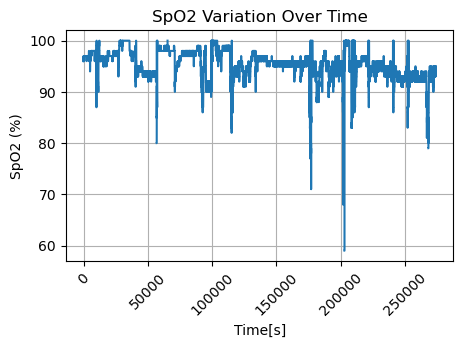

In [3]:
data_icu=pd.read_table('ICU_COVID_patient1.csv',delimiter=',')
data_icu['Time'] = pd.to_datetime(data_icu['Time'])
data_icu['SpO2'] = pd.to_numeric(data_icu['SpO2'], errors='coerce')

# Plot SpO2 
plt.figure(figsize=(5, 3))
plt.plot(range(0, len(data_icu['SpO2'])), data_icu['SpO2'])

plt.xlabel('Time[s]')
plt.ylabel('SpO2 (%)')
plt.title('SpO2 Variation Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Next, we will use the preprocessing abilities of the OBM toolbox to clean our raw SpO2 signal. Here we use the median filter with a filter length of 301 to demonstrate the smoothing on the signal. In practice, we use of filter with a shorter length.

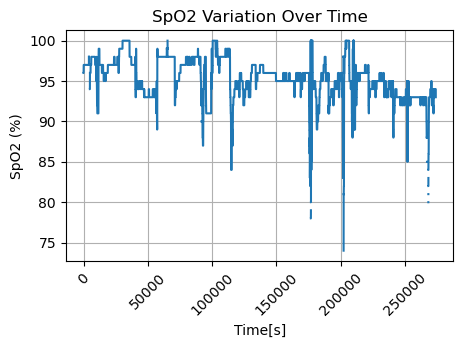

In [4]:
spo2_signal= data_icu['SpO2']
spo2_signal = set_range(spo2_signal)
spo2_signal = median_spo2(spo2_signal, FilterLength=301)

plt.figure(figsize=(5, 3))
plt.plot(range(0, len(spo2_signal)), spo2_signal)

plt.xlabel('Time[s]')
plt.ylabel('SpO2 (%)')
plt.title('SpO2 Variation Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Next, we will use the OBM toolbox to extract desaturations events.

In [5]:
from pobm.obm.desat import DesaturationsMeasures, desat_embedding
from pobm.prep import set_range, median_spo2

def features_all_desat(signal, time_signal, ODI_Threshold = 6, hard_threshold = 88, relative = True, desat_max_length = 14400):
    time_signal = np.array(time_signal)

    desat_class = DesaturationsMeasures(ODI_Threshold=ODI_Threshold,hard_threshold=hard_threshold, relative=relative, desat_max_length=desat_max_length)
    desat_class.compute(signal)

    begin_idx = desat_class.begin
    end_idx = desat_class.end

    desaturations, desaturation_valid, desaturation_length_all, desaturation_int_100_all, \
    desaturation_int_max_all, desaturation_depth_100_all, desaturation_depth_max_all, \
    desaturation_slope_all = desat_embedding(begin_idx, end_idx)
    time_spo2_array = np.array(range(len(signal)))

    starts = []
    for (i, desaturation) in enumerate(desaturations):
        starts.append(desaturation['Start'])
        desaturation_idx = (time_spo2_array >= desaturation['Start']) & (time_spo2_array <= desaturation['End'])

        if np.sum(desaturation_idx) == 0:
            continue
        signal = np.array(signal)

        desaturation_time = time_spo2_array[desaturation_idx]
        desaturation_spo2 = signal[desaturation_idx]
        desaturation_min = np.nanmin(desaturation_spo2)
        desaturation_max = np.nanmax(desaturation_spo2)

        desaturation_valid[i] = True
        desaturation_length_all[i] = desaturation['Duration']
        desaturation_int_100_all[i] = np.nansum(100 - desaturation_spo2)
        desaturation_int_max_all[i] = np.nansum(desaturation_max - desaturation_spo2)
        desaturation_depth_100_all[i] = 100 - desaturation_min
        desaturation_depth_max_all[i] = desaturation_max - desaturation_min

        desaturation_idx_max = np.where(desaturation_spo2 == desaturation_max)[0][0]  
        desaturation_idx_min = np.where(desaturation_spo2 == desaturation_min)[0][-1] 
        desaturation_idx_max_min = np.arange(desaturation_idx_max, desaturation_idx_min + 1)

        if len(desaturation_idx_max_min) > 0:
            p = np.polyfit(np.int64(desaturation_time[desaturation_idx_max_min]),
                           desaturation_spo2[desaturation_idx_max_min], 1)

            desaturation_slope_all[i] = p[0]

    begin_time = time_signal[begin_idx]
    end_time = time_signal[end_idx]

    desat_patient = pd.DataFrame({
        "begin": begin_time,
        "end": end_time,
        "begin_idx": begin_idx,
        "end_idx": end_idx,
        "depth": desaturation_depth_max_all,
        "length": desaturation_length_all,
        "area": desaturation_int_max_all  
    })
    return desat_patient

test_desat = features_all_desat(spo2_signal,data_icu['Time'],ODI_Threshold=4, hard_threshold=93, relative=False, desat_max_length =14400)

test_desat

,begin,end,begin_idx,end_idx,depth,length,area
0,2021-02-01 10:12:00,2021-02-01 10:31:00,10492,11594,2.0,1102.0,2015.0
1,2021-02-01 23:05:00,2021-02-01 23:05:00,56831,56833,2.0,2.0,4.0
2,2021-02-01 23:06:00,2021-02-01 23:06:00,56932,56944,2.0,12.0,23.0
3,2021-02-01 23:09:00,2021-02-01 23:13:00,57096,57355,5.0,259.0,1052.0
4,2021-03-01 03:01:00,2021-03-01 03:05:00,71032,71275,1.0,243.0,243.0
5,2021-03-01 08:44:00,2021-03-01 08:45:00,91624,91634,2.0,10.0,20.0
6,2021-03-01 08:57:00,2021-03-01 09:13:00,92351,93338,6.0,987.0,3930.0
7,2021-03-01 09:45:00,2021-03-01 10:52:00,95279,99290,2.0,4011.0,7933.0
8,2021-03-01 15:03:00,2021-03-01 15:40:00,114350,116569,9.0,2219.0,9639.0
9,2021-03-01 17:49:00,2021-03-01 18:02:00,124305,125076,1.0,771.0,771.0


Next, we will extract the different biomarkers with non-overlapping windows of 1h on the SpO2 signal.

In [6]:
import os

import pandas as pd
import numpy as np

from pobm.obm.complex import ComplexityMeasures
from pobm.obm.desat import DesaturationsMeasures
from pobm.obm.burden import HypoxicBurdenMeasures
from pobm.obm.general import OverallGeneralMeasures
from pobm.obm.periodicity import PRSAMeasures, PSDMeasures
from pobm.prep import set_range, median_spo2

def extract_biomarkers_per_signal(signal, patient, time_begin, time_end):
    complexity_class = ComplexityMeasures()
    results_complexity = complexity_class.compute(signal)

    desat_class = DesaturationsMeasures()
    results_desat = desat_class.compute(signal)

    hypoxic_class = HypoxicBurdenMeasures(results_desat.begin, results_desat.end)
    results_hypoxic = hypoxic_class.compute(signal)

    statistics_class = OverallGeneralMeasures()
    results_overall = statistics_class.compute(signal)

    prsa_class = PRSAMeasures()
    results_PRSA = prsa_class.compute(signal)

    psd_class = PSDMeasures()
    results_PSD = psd_class.compute(signal)

    biomarkers = pd.DataFrame({
        "time begin": [time_begin],
        "time end": [time_end],
        "patient": [patient],
        "AV": [results_overall.AV],
        "MED": [results_overall.MED],
        "Min": [results_overall.Min],
        "SD": [results_overall.SD],
        "RG": [results_overall.RG],
        "P": [results_overall.P],
        "M": [results_overall.M],
        "ZC": [results_overall.ZC],
        "DI": [results_overall.DI],

        "ODI": [results_desat.ODI],

        "DL_u": [results_desat.DL_u],
        "DL_sd": [results_desat.DL_sd],
        "DA100_u": [results_desat.DA100_u],
        "DA100_sd": [results_desat.DA100_sd],
        "DAmax_u": [results_desat.DAmax_u],
        "DAmax_sd": [results_desat.DAmax_sd],
        "DD100_u": [results_desat.DD100_u],
        "DD100_sd": [results_desat.DD100_sd],
        "DDmax_u": [results_desat.DDmax_u],
        "DDmax_sd": [results_desat.DDmax_sd],
        "DS_u": [results_desat.DS_u],
        "DS_sd": [results_desat.DS_sd],
        "TD_u": [results_desat.TD_u],
        "TD_sd": [results_desat.TD_sd],

        "CA": [results_hypoxic.CA],
        "CT": [results_hypoxic.CT],
        "POD": [results_hypoxic.POD],
        "AODmax": [results_hypoxic.AODmax],
        "AOD100": [results_hypoxic.AOD100],

        "ApEn": [results_complexity.ApEn],
        "LZ": [results_complexity.LZ],
        "CTM": [results_complexity.CTM],
        "SampEn": [results_complexity.SampEn],
        "DFA": [results_complexity.DFA],

        "PRSAc": [results_PRSA.PRSAc],
        "PRSAad": [results_PRSA.PRSAad],
        "PRSAos": [results_PRSA.PRSAos],
        "PRSAsb": [results_PRSA.PRSAsb],
        "PRSAsa": [results_PRSA.PRSAsa],
        "AC": [results_PRSA.AC],

        "PSD_total": [results_PSD.PSD_total],
        "PSD_band": [results_PSD.PSD_band],
        "PSD_ratio": [results_PSD.PSD_ratio],
        "PSD_peak": [results_PSD.PSD_peak],
    })
    return biomarkers

spo2_signal= data_icu['SpO2']
time_signal= range(int(len(spo2_signal)))
biomarker = pd.DataFrame()

for i in range(10):  #for the whole signal int(len(spo2_signal) / 3600)
    spo2_window = spo2_signal[3600 * i: 3600 * (i + 1)]
    time_begin, time_end = time_signal[3600 * i], time_signal[3600 * (i + 1)]
    spo2_window = set_range(spo2_window)
    spo2_window = median_spo2(spo2_window)
    biomarker_window = extract_biomarkers_per_signal(spo2_window, "Patient_1", time_begin, time_end)
    biomarker = pd.concat([biomarker, biomarker_window])
    
biomarker



,time begin,time end,patient,AV,MED,Min,SD,RG,P,M,...,PRSAc,PRSAad,PRSAos,PRSAsb,PRSAsa,AC,PSD_total,PSD_band,PSD_ratio,PSD_peak
0,0,3600,Patient_1,96.965556,97.0,96.0,0.182368,1.0,96.00,0.000000,...,-0.500000,1.000000,-0.059774,1.818182e-02,3.030303e-02,111770.000000,0.001471,0.000487,0.330780,0.000156
0,3600,7200,Patient_1,97.291989,97.0,94.0,0.748002,4.0,95.45,0.166667,...,-0.500000,6.312500,0.373637,6.056818e-01,3.106061e-02,107842.199219,0.009078,0.001840,0.202711,0.000485
0,7200,10800,Patient_1,96.704444,98.0,87.0,2.400667,13.0,88.00,18.083333,...,-0.500000,1.071429,-0.067383,1.847042e-02,1.269841e-02,107806.061224,0.112116,0.003762,0.033555,0.001242
0,10800,14400,Patient_1,95.958333,97.0,90.0,2.736571,10.0,91.00,22.500000,...,-0.500000,1.000000,-0.053092,2.189638e-02,5.259042e-02,109075.196670,0.024723,0.001581,0.063939,0.000541
0,14400,18000,Patient_1,96.017222,96.0,95.0,0.551999,2.0,95.00,0.000000,...,-0.500000,1.000000,-0.059326,1.427175e-02,3.929619e-02,110541.093652,0.008111,0.001827,0.225275,0.000518
0,18000,21600,Patient_1,96.750833,97.0,95.0,0.447058,3.0,96.00,0.000000,...,-0.500000,1.000000,-0.055102,4.891775e-02,1.774892e-02,111855.877551,0.002709,0.000548,0.202417,0.000137
0,21600,25200,Patient_1,97.107778,97.0,96.0,0.355193,2.0,96.00,0.000000,...,-0.500000,1.000000,-0.053634,1.847042e-02,5.137085e-02,113609.834467,0.003724,0.000909,0.243998,0.000251
0,25200,28800,Patient_1,97.826389,98.0,93.0,1.049404,7.0,95.00,2.444444,...,-0.519231,1.153846,-0.076605,-3.729604e-03,1.328671e-02,113194.224852,0.014539,0.001636,0.112555,0.000617
0,28800,32400,Patient_1,99.576944,100.0,98.0,0.512263,2.0,99.00,0.000000,...,-0.500000,1.000000,-0.051235,5.974026e-02,2.077922e-02,118049.326531,0.001883,0.000369,0.196130,0.000096
0,32400,36000,Patient_1,99.890556,100.0,98.0,0.433615,2.0,98.00,0.000000,...,-0.500000,1.000000,-0.075188,-1.683557e-15,1.683557e-15,117611.000000,0.001339,0.000112,0.083437,0.000056



## Clinical applications
### Obstructive sleep apnea (OSA)
OSA is a public health problem that affects a large part of the general adult population with up to 50% of the general adult male population and 23% of the general adult female population. It is estimated that the majority of individuals with OSA are undiagnosed and untreated. At an individual level, OSA leads not only to a significant decrease in quality of life and functional capacity, but also to a markedly increased risk of cardiovascular disease and additional comorbidities such as diabetes, hypertension and stroke [13]. Polysomnography (PSG) is the gold standard for diagnosing OSA. PSG is a sleep study performed at the hospital where a number of signals are recorded including brain activity, oxygen level, heart rate, breathing activity and movement [14]. This diagnosis process is expensive, cumbersome and cannot be scaled to match the need. We hypothesized that it is possible to diagnose OSA from nocturnal oximetry recording only. Using the pobm toolbox, we have shown that it is possible to diagnose OSA accurately on a large population sample (> 900 patients). The pobm toolbox was used in combination with Apnea-hypopnea index (AHI) [15] in a regression framework, on the SHHS database [16]. When combining the 10 oximetry biomarkers with the best score, the goodness of fit was the highest ( R2 = 0.82). Thus, several features extracted using the pobm toolbox on SpO2 time-series are good predictors of AHI and enable OSA diagnosis using a single channel oximetry recording.

### Chronic obstructive pulmonary disease (COPD)
COPD is a highly prevalent chronic condition [17]. This disease is characterized by persistent airflow limitation that is usually progressive and an enhanced chronic inflammatory response to noxious particles or gases in the airways and the lungs. COPD is a major source of morbidity, mortality and healthcare costs. A large proportion of individuals with COPD are undiagnosed and untreated. Therefore, it is critical to develop new algorithms to detect COPD. We hypothesized that using OBM we could diagnose COPD overnight thus creating a new pathway for COPD management. A study has been conducted by our group on n=350 patients PSG recordings, using the OBM from the pobm toolbox and 5 demographic features [18]. A Random Forest classifier has been trained, using nested cross-fold validation over the dataset. A total AUROC of 0.94 was obtained, along with F1 score = 0.89. Hence, this research suggests that COPD can be diagnosed from nocturnal oximetry times series, with a high accuracy rate.

### Intelligent monitoring of critically-ill COVID-19 patients
The surge of the COVID-19 pandemic sparked unprecedented challenges in ensuring quality care to critically-ill hospitalized patients.Critical care medicine is complex, resource intensive and expensive. It is a dynamic and highly technical field of medicine taking care of the sickest of patients. Decisions need to be made rapidly based on the evolving clinical state and the interpretation by clinicians of continuous physiological data [19]. We hypothesized that using OBM we could better track the health trajectory of patients with severe COVID-19. Consequently, our current research includes data collected at the Rambam hospital (Haifa), comprising more than 300 patients with COVID-19 admitted to the hospitals and continuously monitored. All physiological data and associated clinical information were gathered from the hospitals’ monitors and electronic medical record systems (EMR) and stored in a dedicated secure database [20-21]. Using these OBM as input, machine learning models are trained to predict the occurrence of clinically-important events ahead of time. Specifically, the future need for mechanical ventilation and imminent occurance of oxygen desaturation. Oximetry traces are currently analyzed using our OBM toolbox [2] to identify digital biomarkers that capture specific oximetry events as well as the dynamics of the time series over long periods of time (Figure 5). OBMs enables to disciminate between critical or non-critical patients (Figure 6).Thus, our OBM toolbox enables intelligent monitoring of critically-ill patients with pneumonia such as those with COVID-19 within the ICU and Ward. Novel algorithms that can predict the deterioration of critically ill
patients will enable a better management and save lives.

<img src="OBM_monitoring.gif" width=500 height=300 />

**Figure 5**: Temporal tracking of oximetry biomarkers. On the first panel, the SpO2 signal of a single patient is presented. The red vertical line indicates the initiation of invasive ventilation. In the panel at the bottom, a few representative biomarkers of each category are presented in the animation.


<img src="Volcanoes.png" width=700 height=300 />

**Figure 6**: OBMs across the spectrum of disease severity and treatment support. A) Critical versus non-critical without support and B) critical versus non-critical under oxygen
support.

## Conclusions

The emerging role of portable biosensors in clinical practice is raising substantial interest [4, 3]. Portable devices and sensors that can record a variety of biosignals are already the subject of numerous clinical trials. Yet, the intelligent and robust algorithms that can make use of such remotely acquired data is lacking leading to a poor adoption of remote sensing technology in medical practice. 

Our work on oximetry biomarkers will enable to create novel pathways and algorithms for OSA, COPD diagnosis and COVID-19 monitoring, from data collected from portable devices or hospital monitors. In particular, sleep is an ideal time frame for the collection of long and clean physiological time series data which can then be analyzed using data-driven algorithms [22]. Our OBM Toolbox can thus extract important features form SpO2 signals measured from portable sensors. Novel machine learning algorithms using OBM can provide a novel pathway for the diagnosis and management of pulmonary/respiratory conditions.

# References

[1] Gazi Maruf Azmal, Adel Al-Jumaily, et al. Continuous measurement of oxygen saturation level
using photoplethysmography signal. In 2006 International Conference on Biomedical and Pharmaceutical Engineering, pages 504–507. IEEE, 2006.

[2] Jeremy Levy, Daniel  ́Alvarez, Aviv A Rosenberg, Alexandra Alexandrovich, F  ́elix Del Campo, and
Joachim A Behar. Digital oximetry biomarkers for assessing respiratory function: standards of
measurement, physiological interpretation, and clinical use. npj Digital Medicine, 4(1):1–14, 2020.

[3] Ali K Yetisen, Juan Leonardo Martinez-Hurtado, Barıs ̧  ̈Unal, Ali Khademhosseini, and Haider Butt.
Wearables in medicine. Advanced Materials, 30(33):1706910, 2018.

[4] Joachim A Behar, Chengyu Liu, Yaniv Zigel, Pablo Laguna, and Gari D Clifford. Editorial on
remote health monitoring: from chronic diseases to pandemics. Physiological Measurement,
41(10):100401, 2020.

[5] D. Yang, J. Zhu, and P. Zhu. Spo2 and heart rate measurement with wearable watch based on ppg.
In 2015 IET International Conference on Biomedical Image and Signal Processing (ICBISP 2015),
pages 1–5, 2015.

[6] Joachim A. Behar, Aviv A. Rosenberg, Ido Weiser-Bitoun, Ori Shemla, Alexandra Alexandrovich,
Eugene Konyukhov, and Yael Yaniv. Physiozoo: A novel open access platform for heart rate vari-
ability analysis of mammalian electrocardiographic data. Frontiers in Physiology, 9:1390, 2018.

[7] B. Xie and H. Minn. Real-time sleep apnea detection by classifier combination. IEEE Transactions
on Information Technology in Biomedicine, 16(3):469–477, 2012.

[8] Jean Louis Pepin, Patrick Levy, Bruno Lepaulle, Christian Brambilla, and Christian Guilleminault.
Does oximetry contribute to the detection of apneic events?: Mathematical processing of the sao2
signal. Chest, 99(5):1151 – 1157, 1991.

[9] S M Pincus. Approximate entropy as a measure of system complexity. Proceedings of the National
Academy of Sciences, 88(6):2297–2301, 1991.

[10] C.-K. Peng, Shlomo Havlin, H. Eugene Stanley, and Ary L. Goldberger. Quantification of scaling
exponents and crossover phenomena in nonstationary heartbeat time series. Chaos: An Interdisciplinary Journal of Nonlinear Science, 5(1):82–87, 1995.

[11] M. Deviaene, D. Testelmans, B. Buyse, P. Borz  ́ee, S. Van Huffel, and C. Varon. Automatic screening of sleep apnea patients based on the spo2 signal. IEEE Journal of Biomedical and Health
Informatics, 23(2):607–617, 2019.

[12] L. G. OLSON, A. AMBROGETTI, and S. G. GYULAY. Prediction of sleep-disordered breathing by
unattended overnight oximetry. Journal of Sleep Research, 8(1):51–55, 1999.

[13] Naresh A Dewan, F Javier Nieto, and Virend K Somers. Intermittent hypoxemia and osa: implications for comorbidities. Chest, 147(1):266–274, 2015.

[14] Joachim A Behar, Niclas Palmius, Sroussi Zacharie, Armand Chocron, Thomas Penzel, Lia Bittencourt, and Sergio Tufik. Single-channel oximetry monitor versus in-lab polysomnography oximetry analysis: does it make a difference? Physiological Measurement, 41(4):044007, 2020.

[15] Antti Kulkas, Pekka Tiihonen, Petro Julkunen, Esa Mervaala, and Juha Toyras. Novel parameters
indicate significant differences in severity of obstructive sleep apnea with patients having similar
apnea–hypopnea index. Medical & biological engineering & computing, 51(6):697–708, 2013.

[16] Guo-Qiang Zhang, Licong Cui, Remo Mueller, Shiqiang Tao, Matthew Kim, Michael Rueschman,
Sara Mariani, Daniel Mobley, and Susan Redline. The National Sleep Research Resource: towards a sleep data commons. Journal of the American Medical Informatics Association, 25(10):1351–
1358, 05 2018.

[17] Joan B. Soriano, Inmaculada Alfageme, Marc Miravitlles, Pilar de Lucas, Juan Jose Soler-
Cataluna, Francisco Garcıa-Rıo, Ciro Casanova, Jose Miguel Rodrıguez Gonzalez-Moro, Borja G.
Cosıo, Guadalupe Sanchez, and Julio Ancochea. Prevalence and determinants of copd in spain:
Episcan ii. Archivos de Bronconeumolog ́ıa, 57(1):61 – 69, 2021.

[18] Jeremy Levy, Daniel Alvarez, Felix del Campo, and Joachim A. Behar. Machine learning for nocturnal diagnosis of chronic obstructive pulmonary disease using digital oximetry biomarkers, 2020.

[19] Alistair EW Johnson, Mohammad M Ghassemi, Shamim Nemati, Katherine E Niehaus, David A
Clifton, and Gari D Clifford. Machine learning and decision support in critical care. Proceedings of
the IEEE, 104(2):444–466, 2016.

[20] Anat Reiner Benaim, Jonathan Aryeh Sobel, Ronit Almog, Snir Lugassy, Tsviel Ben Shabbat,
Alistair Johnson, Danny Eytan, and Joachim A Behar. Comparing COVID-19 and Influenza Presentation and Trajectory. Frontiers in Medicine, 2021.

[21] Sobel, J.A., Levy, J., Almog, R. et al. Descriptive characteristics of continuous oximetry measurement in moderate to severe covid-19 patients. Sci Rep 13, 442 (2023).

[22] Joachim A Behar. From sleep medicine to medicine during sleep: a new paradigm. Sleep,
43(1):zsz279, 2020.



